# Data Import

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ozone_betb011 = pd.read_csv("/content/drive/My Drive/DataThesis/ozone_betb011.csv")
ozone_betr012 = pd.read_csv("/content/drive/My Drive/DataThesis/ozone_betr012.csv")
ozone_betb004 = pd.read_csv("/content/drive/My Drive/DataThesis/ozone_betb004.csv")
ozone_betr001 = pd.read_csv("/content/drive/My Drive/DataThesis/ozone_betr001.csv")
ozone_betmeu1 = pd.read_csv("/content/drive/My Drive/DataThesis/ozone_betmeu1.csv")

In [3]:
betb011_ozone_ori = ozone_betb011.copy()
betr012_ozone_ori = ozone_betr012.copy()
betb004_ozone_ori = ozone_betb004.copy()
betr001_ozone_ori = ozone_betr001.copy()
betmeu1_ozone_ori = ozone_betmeu1.copy()

# POLINOMIAL INTER

The following statements remove concentration value until 20% are 'NaN', to compute the MAE from these observations. We then perform the numpy interpolation, and remove the columns that were originally 'NaN' to compare both dataframes using the MAE.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
import random

# Set the seed
random.seed(19)

obj = 0.20 # Percentage of observations that are going to be removed, to interpolate the removed observations and compute the MSE.

# Betb011

In [6]:
missing_values = int(len(ozone_betb011) * obj)
random_indices = np.random.choice(ozone_betb011.index, missing_values, replace=False)
ozone_betb011.loc[random_indices, 'Concentration'] = np.nan
ozone_betb011['Concentration'] = np.interp(ozone_betb011.index, ozone_betb011.dropna().index, ozone_betb011['Concentration'].dropna())

indices_to_remove_1 = []
for index, row in betb011_ozone_ori.iterrows():
    if np.isnan(row['Concentration']):
        indices_to_remove_1.append(index)
ozone_betb011.drop(indices_to_remove_1, inplace=True)
betb011_ozone_ori.drop(indices_to_remove_1, inplace=True)

In [7]:
print(random_indices)

[ 2958  1834 14859 ... 10612  6435  3821]


In [8]:
mse_b011 = mean_squared_error(ozone_betb011['Concentration'],betb011_ozone_ori['Concentration'])

In [9]:
mse_b011

5.378732709835805

# Betr012

In [10]:
missing_values = int(len(ozone_betr012) * obj)
random_indices = np.random.choice(ozone_betr012.index, missing_values, replace=False)
ozone_betr012.loc[random_indices, 'Concentration'] = np.nan
ozone_betr012['Concentration'] = np.interp(ozone_betr012.index, ozone_betr012.dropna().index, ozone_betr012['Concentration'].dropna())

indices_to_remove_1 = []
for index, row in betr012_ozone_ori.iterrows():
    if np.isnan(row['Concentration']):
        indices_to_remove_1.append(index)
ozone_betr012.drop(indices_to_remove_1, inplace=True)
betr012_ozone_ori.drop(indices_to_remove_1, inplace=True)

In [11]:
print(random_indices)

[ 7693  9245 12370 ... 15084  8901  6941]


In [12]:
mse_r012 = mean_squared_error(ozone_betr012['Concentration'],betr012_ozone_ori['Concentration'])

In [13]:
mse_r012

4.401389995803397

# Betb004

In [14]:
missing_values = int(len(ozone_betb004) * obj)
random_indices = np.random.choice(ozone_betb004.index, missing_values, replace=False)
ozone_betb004.loc[random_indices, 'Concentration'] = np.nan
ozone_betb004['Concentration'] = np.interp(ozone_betb004.index, ozone_betb004.dropna().index, ozone_betb004['Concentration'].dropna())

indices_to_remove_1 = []
for index, row in betb004_ozone_ori.iterrows():
    if np.isnan(row['Concentration']):
        indices_to_remove_1.append(index)
ozone_betb004.drop(indices_to_remove_1, inplace=True)
betb004_ozone_ori.drop(indices_to_remove_1, inplace=True)

In [15]:
print(random_indices)

[2101 7792 5638 ... 7119 8427 1817]


In [16]:
mse_b004 = mean_squared_error(ozone_betb004['Concentration'],betb004_ozone_ori['Concentration'])

In [17]:
mse_b004

4.317601133939019

# Betr001

In [18]:
missing_values = int(len(ozone_betr001) * obj)
random_indices = np.random.choice(ozone_betr001.index, missing_values, replace=False)
ozone_betr001.loc[random_indices, 'Concentration'] = np.nan
ozone_betr001['Concentration'] = np.interp(ozone_betr001.index, ozone_betr001.dropna().index, ozone_betr001['Concentration'].dropna())

indices_to_remove_1 = []
for index, row in betr001_ozone_ori.iterrows():
    if np.isnan(row['Concentration']):
        indices_to_remove_1.append(index)
ozone_betr001.drop(indices_to_remove_1, inplace=True)
betr001_ozone_ori.drop(indices_to_remove_1, inplace=True)

In [19]:
print(random_indices)

[14529  5996 11888 ...  9799    17  9834]


In [20]:
mse_r001 = mean_squared_error(ozone_betr001['Concentration'],betr001_ozone_ori['Concentration'])

In [21]:
mse_r001

5.066063248745501

# Betmeu1

In [22]:
missing_values = int(len(ozone_betmeu1) * obj)
random_indices = np.random.choice(ozone_betmeu1.index, missing_values, replace=False)
ozone_betmeu1.loc[random_indices, 'Concentration'] = np.nan
ozone_betmeu1['Concentration'] = np.interp(ozone_betmeu1.index, ozone_betmeu1.dropna().index, ozone_betmeu1['Concentration'].dropna())

indices_to_remove_1 = []
for index, row in betmeu1_ozone_ori.iterrows():
    if np.isnan(row['Concentration']):
        indices_to_remove_1.append(index)
ozone_betmeu1.drop(indices_to_remove_1, inplace=True)
betmeu1_ozone_ori.drop(indices_to_remove_1, inplace=True)

In [23]:
print(random_indices)

[ 3091 11184  3157 ...  6934  1960  1504]


In [24]:
mse_meu1 = mean_squared_error(ozone_betmeu1['Concentration'],betmeu1_ozone_ori['Concentration'])

In [25]:
mse_meu1

5.272537673373239

# **Evaluation between datasets**

In [26]:
x_values = ['betb011','betr012','betb004','betr001','betmeu1']
y_values_lininter = [mse_b011,mse_r012,mse_b004,mse_r001,mse_meu1]
# y_values_sarimax = [1018.2781136253669,977.1734765765663,869.3606901178483,804.6533299438154,896.0297470664505]

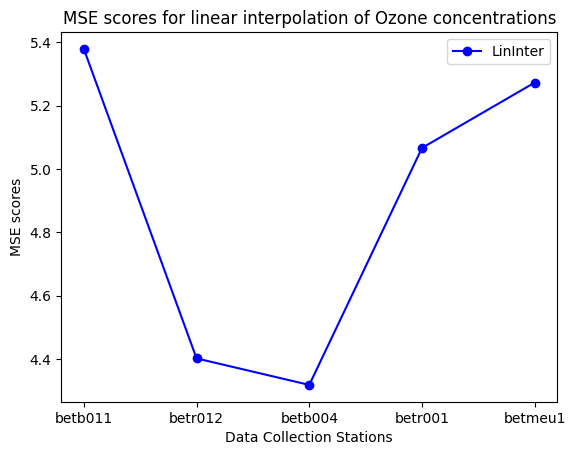

In [28]:
plt.plot(x_values, y_values_lininter, label='LinInter', marker='o', color='blue')
plt.xlabel('Data Collection Stations')
plt.ylabel('MSE scores')
plt.title('MSE scores for linear interpolation of Ozone concentrations')
plt.legend()
plt.show()